# Example of Loading and pre-processing data for causality project

#### Using Iris for NetCDF data load and processing; Using xclim (and xarray) for calculating the FWI

### __Calculate boreal summer Canadian Fire Weather Index (JJA) averages for Borneo DROUGHT__

#### Imports

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import xarray as xr 

import xclim

#### Set data path

In [4]:
DATA_PATH = '/era5/'

#### Load daily precipitation data into an Iris cube

In [4]:
precip_path = os.path.join(DATA_PATH, 'pr_daily.nc')
iris.load (precip_path)

precip = iris.load_cube(precip_path, 'Total precipitation')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()

In [5]:
print(precip)

Total precipitation / (m)           (time: 13149; latitude: 41; longitude: 61)
    Dimension coordinates:
        time                             x                -              -
        latitude                         -                x              -
        longitude                        -                -              x
    Attributes:
        Conventions                 'CF-1.6'
        history                     '2022-06-06 10:31:41 GMT by grib_to_netcdf-2.24.3: /opt/ecmwf/mars-client/bin/grib_to_netcdf...


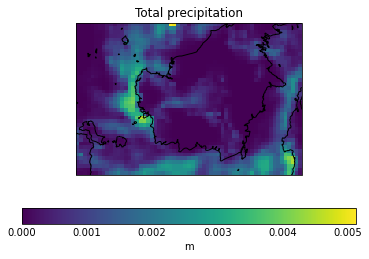

In [124]:
qplt.pcolormesh(precip[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Load daily wind data into an Iris cube

In [4]:
wind_path = os.path.join(DATA_PATH, 'wind_era5.nc')
iris.load (wind_path)

[<iris 'Cube' of eastward_wind / (m s**-1) (time: 13149; latitude: 41; longitude: 61)>,
<iris 'Cube' of northward_wind / (m s**-1) (time: 13149; latitude: 41; longitude: 61)>]

In [4]:
uwind = iris.load_cube(precip_path, '10 metre U wind component')
uwind.coord('latitude').guess_bounds()
uwind.coord('longitude').guess_bounds()

In [10]:
print (uwind)

10 metre U wind component / (m s**-1) (time: 13149; latitude: 41; longitude: 61)
    Dimension coordinates:
        time                               x                -              -
        latitude                           -                x              -
        longitude                          -                -              x
    Attributes:
        Conventions                   'CF-1.6'
        history                       '2022-06-06 10:31:41 GMT by grib_to_netcdf-2.24.3: /opt/ecmwf/mars-client/bin/grib_to_netcdf...


In [11]:
vwind = iris.load_cube(wind_path, 'northward_wind')
vwind.coord('latitude').guess_bounds()
vwind.coord('longitude').guess_bounds()

In [5]:
vwind = iris.load_cube(precip_path, '10 metre V wind component')
vwind.coord('latitude').guess_bounds()
vwind.coord('longitude').guess_bounds()

In [13]:
print (vwind)

10 metre V wind component / (m s**-1) (time: 13149; latitude: 41; longitude: 61)
    Dimension coordinates:
        time                               x                -              -
        latitude                           -                x              -
        longitude                          -                -              x
    Attributes:
        Conventions                   'CF-1.6'
        history                       '2022-06-06 10:31:41 GMT by grib_to_netcdf-2.24.3: /opt/ecmwf/mars-client/bin/grib_to_netcdf...


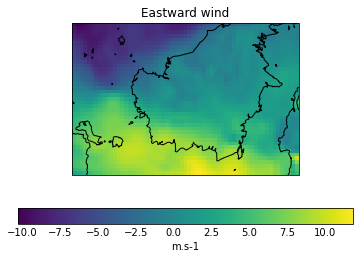

In [79]:
# Eastward_wind from wind_era5.nc
qplt.pcolormesh(uwind[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Calculate wind speed

In [6]:
uwind_sq = iris.analysis.maths.apply_ufunc (np.square, uwind, new_name = '10 metre U wind component', new_unit=uwind.units)

In [7]:
print (uwind_sq)

10 metre U wind component / (m s**-1) (time: 12418; latitude: 29; longitude: 41)
    Dimension coordinates:
        time                               x                -              -
        latitude                           -                x              -
        longitude                          -                -              x
    Attributes:
        Conventions                   'CF-1.6'
        history                       '2023-08-22 14:32:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin...


In [8]:
vwind_sq = iris.analysis.maths.apply_ufunc (np.square, vwind, new_name = '10 metre V wind component', new_unit=vwind.units)

In [9]:
print (vwind_sq)

10 metre V wind component / (m s**-1) (time: 12418; latitude: 29; longitude: 41)
    Dimension coordinates:
        time                               x                -              -
        latitude                           -                x              -
        longitude                          -                -              x
    Attributes:
        Conventions                   'CF-1.6'
        history                       '2023-08-22 14:32:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin...


In [10]:
uwind_vwind_sq = iris.analysis.maths.add (uwind_sq, vwind_sq)

In [89]:
print (uwind_vwind_sq)

unknown / (m s**-1)                 (time: 12418; latitude: 29; longitude: 41)
    Dimension coordinates:
        time                             x                -              -
        latitude                         -                x              -
        longitude                        -                -              x
    Attributes:
        Conventions                 'CF-1.6'
        history                     '2023-08-22 14:32:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin...


In [11]:
wind = iris.analysis.maths.apply_ufunc (np.sqrt, uwind_vwind_sq, new_name = 'wind speed', new_unit = uwind_vwind_sq.units)

In [12]:
wind.units

Unit('m s**-1')

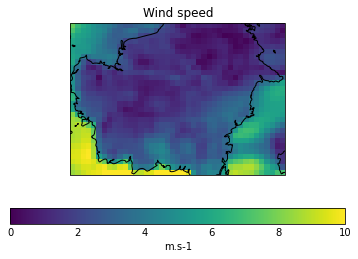

In [14]:
qplt.pcolormesh(wind[0], vmax = 10, vmin = 0) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Load daily temperature data into an Iris cube

In [15]:
temp = iris.load_cube(precip_path, '2 metre temperature')
temp.coord('latitude').guess_bounds()
temp.coord('longitude').guess_bounds()

In [99]:
print (temp)

2 metre temperature / (K)           (time: 12418; latitude: 29; longitude: 41)
    Dimension coordinates:
        time                             x                -              -
        latitude                         -                x              -
        longitude                        -                -              x
    Attributes:
        Conventions                 'CF-1.6'
        history                     '2023-08-22 14:32:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin...


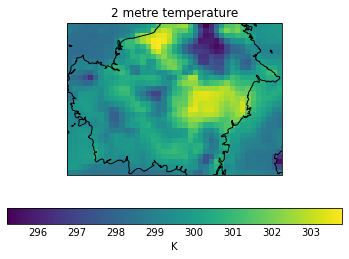

In [16]:
qplt.pcolormesh(temp[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Load daily relative humidity data into an Iris cube

In [30]:
rh_path = os.path.join(DATA_PATH, 'rh_era5.nc')
iris.load (rh_path)

[<iris 'Cube' of relative_humidity / (%) (time: 12418; latitude: 29; longitude: 41)>]

In [30]:
rh_path_global = os.path.join(DATA_PATH, 'rh_era5_global.nc')
iris.load (rh_path_global)

[<iris 'Cube' of relative_humidity / (%) (time: 183; latitude: 721; longitude: 1440)>]

In [31]:
rh = iris.load_cube(rh_path, 'relative_humidity')
rh.coord('latitude').guess_bounds()
rh.coord('longitude').guess_bounds()

In [198]:
rh_global = iris.load_cube(rh_path_global, 'relative_humidity')
rh_global.coord('latitude').guess_bounds()
rh_global.coord('longitude').guess_bounds()

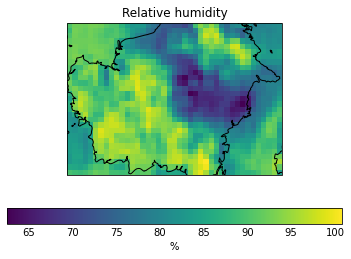

In [32]:
qplt.pcolormesh(rh[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

In [33]:
# Some ERA5 RH data is > 100%, we need to adjust them to 100%.
rh.data[rh.data > 100] = 100

In [278]:
max (rh[1, 29].data)

100.0

#### Extract Borneo region (as specified by https://daac.ornl.gov/CMS/guides/CMS_LiDAR_Indonesia.html) 

In [34]:
# Create a constraint for the latitude and Longitude extents (since the machine is crashing when trying to aggregate by clim season and season year for the whole dataset, let's try to do this first)

s_Borneo_lat = iris.Constraint(latitude=lambda v: v > -3.259 and v <= 3.211 )
s_Borneo_lon = iris.Constraint(longitude=lambda v: v > 109.565 and v <= 117.987 )

s_Borneo_precip =  precip.extract(s_Borneo_lat & s_Borneo_lon) 
s_Borneo_wind = wind.extract(s_Borneo_lat & s_Borneo_lon)
s_Borneo_temp = temp.extract (s_Borneo_lat & s_Borneo_lon)
s_Borneo_rh = rh.extract(s_Borneo_lat & s_Borneo_lon)

#### Plot some data to check

wind speed / (m s**-1)              (time: 12418; latitude: 26; longitude: 34)
    Dimension coordinates:
        time                             x                -              -
        latitude                         -                x              -
        longitude                        -                -              x
    Auxiliary coordinates:
        clim_season                      x                -              -
        season_year                      x                -              -
    Attributes:
        Conventions                 'CF-1.6'
        history                     '2023-08-22 14:32:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin...


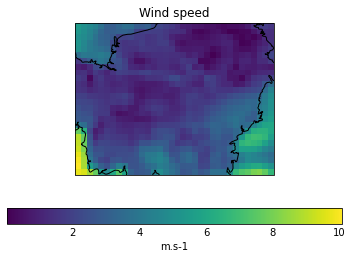

In [27]:
print(s_Borneo_wind)
qplt.pcolormesh(s_Borneo_wind[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

In [36]:
iris.save (s_Borneo_precip, DATA_PATH + 'Borneo_precip_era5_daily.nc')
iris.save (s_Borneo_wind, DATA_PATH + 'Borneo_wind_era5_daily.nc')
iris.save (s_Borneo_temp, DATA_PATH + 'Borneo_temp_era5_daily.nc')
iris.save (s_Borneo_rh, DATA_PATH + 'Borneo_rh_era5_daily.nc')

#### Use xclim package to calculate drought indicators

In [39]:
s_Borneo_precip = xr.open_mfdataset(DATA_PATH + 'Borneo_precip_era5_daily.nc')
s_Borneo_wind = xr.open_mfdataset(DATA_PATH + 'Borneo_wind_era5_daily.nc')
s_Borneo_temp = xr.open_mfdataset(DATA_PATH + 'Borneo_temp_era5_daily.nc')
s_Borneo_rh = xr.open_mfdataset(DATA_PATH + 'Borneo_rh_era5_daily.nc')

In [40]:
# Normalise the time series, since precip centred at 11:30 while the rest are at 19:00.
s_Borneo_precip['time'] = s_Borneo_precip.indexes['time'].normalize()
s_Borneo_wind['time'] = s_Borneo_wind.indexes['time'].normalize()
s_Borneo_temp['time'] = s_Borneo_temp.indexes['time'].normalize()
s_Borneo_rh['time'] = s_Borneo_temp.indexes['time'].normalize()

In [41]:
s_Borneo_precip.tp.attrs['units'] = 'm/day'

In [43]:
# Calculate FWI 
fwi = xclim.indicators.atmos.fire_weather_indexes(tas = s_Borneo_temp.t2m, 
                                                  pr = s_Borneo_precip.tp, 
                                                  sfcWind = s_Borneo_wind.wind_speed, 
                                                  hurs = s_Borneo_rh.r, 
                                                  lat = s_Borneo_precip.latitude)

C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\xclim\core\cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\xclim\core\cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\xclim\core\cfchecks.py:41: UserWarning: Variable has a non-conforming cell_methods: Got `day: year: sum`, which do not include the expected `time: mean`
  _check_cell_methods(


In [44]:
# Select Fire weather index from the output tuple
fwi_index = fwi[5]

In [130]:
# Select the intermediate indices from the output tuple
dc = fwi[0]
dmc = fwi[1]
ffmc = fwi[2]
isi = fwi[3]
bui = fwi[4]

In [45]:
fwi_index

<xarray.DataArray 'fwi' (latitude: 26, longitude: 34, time: 12418)>
dask.array<transpose, shape=(26, 34, 12418), dtype=float64, chunksize=(26, 34, 12418), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31
  * latitude   (latitude) float32 3.25 3.0 2.75 2.5 ... -2.25 -2.5 -2.75 -3.0
  * longitude  (longitude) float32 109.8 110.0 110.2 110.5 ... 117.5 117.8 118.0
    day        (time) int32 dask.array<chunksize=(12418,), meta=np.ndarray>
    year       (time) int32 dask.array<chunksize=(12418,), meta=np.ndarray>
Attributes:
    units:          
    cell_methods:   pr: day: year: sum
    history:        tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2023-08-22 16:09:...
    standard_name:  fire_weather_index
    long_name:      Fire weather index
    description:    Numeric rating of fire intensity.

In [76]:
dmc

<xarray.DataArray 'dmc' (latitude: 26, longitude: 34, time: 13149)>
dask.array<transpose, shape=(26, 34, 13149), dtype=float64, chunksize=(26, 34, 13149), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T19:00:00 ... 2014-12-31T19:00:00
  * latitude   (latitude) float32 3.25 3.0 2.75 2.5 ... -2.25 -2.5 -2.75 -3.0
  * longitude  (longitude) float32 109.8 110.0 110.2 110.5 ... 117.5 117.8 118.0
Attributes:
    units:          
    cell_methods:   
    history:        tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:...
    standard_name:  duff_moisture_code
    long_name:      Duff moisture code
    description:    Numeric rating of the average moisture content of loosely...

In [112]:
ffmc

<xarray.DataArray 'ffmc' (latitude: 26, longitude: 34, time: 13149)>
dask.array<transpose, shape=(26, 34, 13149), dtype=float64, chunksize=(26, 34, 13149), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T19:00:00 ... 2014-12-31T19:00:00
  * latitude   (latitude) float32 3.25 3.0 2.75 2.5 ... -2.25 -2.5 -2.75 -3.0
  * longitude  (longitude) float32 109.8 110.0 110.2 110.5 ... 117.5 117.8 118.0
Attributes:
    units:          
    cell_methods:   
    history:        tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-07-13 21:47:...
    standard_name:  fine_fuel_moisture_code
    long_name:      Fine fuel moisture code
    description:    Numeric rating of the average moisture content of litter ...

In [78]:
isi

<xarray.DataArray 'isi' (latitude: 26, longitude: 34, time: 13149)>
dask.array<transpose, shape=(26, 34, 13149), dtype=float64, chunksize=(26, 34, 13149), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T19:00:00 ... 2014-12-31T19:00:00
  * latitude   (latitude) float32 3.25 3.0 2.75 2.5 ... -2.25 -2.5 -2.75 -3.0
  * longitude  (longitude) float32 109.8 110.0 110.2 110.5 ... 117.5 117.8 118.0
Attributes:
    units:          
    cell_methods:   
    history:        tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:...
    standard_name:  initial_spread_index
    long_name:      Initial spread index
    description:    Numeric rating of the expected rate of fire spread.

In [79]:
bui

<xarray.DataArray 'bui' (latitude: 26, longitude: 34, time: 13149)>
dask.array<transpose, shape=(26, 34, 13149), dtype=float64, chunksize=(26, 34, 13149), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T19:00:00 ... 2014-12-31T19:00:00
  * latitude   (latitude) float32 3.25 3.0 2.75 2.5 ... -2.25 -2.5 -2.75 -3.0
  * longitude  (longitude) float32 109.8 110.0 110.2 110.5 ... 117.5 117.8 118.0
Attributes:
    units:          
    cell_methods:   
    history:        tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:...
    standard_name:  buildup_index
    long_name:      Buildup index
    description:    Numeric rating of the total amount of fuel available for ...

In [80]:
dc

<xarray.DataArray 'dc' (latitude: 26, longitude: 34, time: 13149)>
dask.array<transpose, shape=(26, 34, 13149), dtype=float64, chunksize=(26, 34, 13149), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T19:00:00 ... 2014-12-31T19:00:00
  * latitude   (latitude) float32 3.25 3.0 2.75 2.5 ... -2.25 -2.5 -2.75 -3.0
  * longitude  (longitude) float32 109.8 110.0 110.2 110.5 ... 117.5 117.8 118.0
Attributes:
    units:          
    cell_methods:   
    history:        tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:...
    standard_name:  drought_code
    long_name:      Drought code
    description:    Numeric rating of the average moisture content of deep, c...

In [46]:
fwi_index.to_netcdf ('fwi.nc')

In [81]:
dc.to_netcdf('dc.nc')

C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\indices\fwi.py:838: RuntimeWarning: invalid value encountered in _fine_fuel_moisture_code
  out["FFMC"][..., it] = _fine_fuel_moisture_code(


In [82]:
dmc.to_netcdf('dmc.nc')

C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\indices\fwi.py:838: RuntimeWarning: invalid value encountered in _fine_fuel_moisture_code
  out["FFMC"][..., it] = _fine_fuel_moisture_code(


In [305]:
ffmc.to_netcdf('ffmc.nc')

In [306]:
isi.to_netcdf('isi.nc')

In [85]:
bui.to_netcdf('bui.nc')

C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\indices\fwi.py:838: RuntimeWarning: invalid value encountered in _fine_fuel_moisture_code
  out["FFMC"][..., it] = _fine_fuel_moisture_code(


#### Load the drought indicators with Iris, do some plotting and construct time series

In [5]:
fwi_cube = iris.load_cube ('fwi.nc', 'Fire weather index')
print (fwi_cube)
fwi_cube.coord('latitude').guess_bounds()
fwi_cube.coord('longitude').guess_bounds()

Fire weather index / (unknown)      (latitude: 26; longitude: 34; time: 12418)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Auxiliary coordinates:
        day                                  -              -         x
        year                                 -              -         x
    Cell methods:
        sum                         pr, day, year
    Attributes:
        description                 'Numeric rating of fire intensity.'
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2023-08-22 16:09:51] fwi: FWI(tas=t2m,...
        invalid_standard_name       'fire_weather_index'


In [5]:
dc_cube = iris.load_cube ('dc.nc', 'Drought code')
print (dc_cube)
dc_cube.coord('latitude').guess_bounds()
dc_cube.coord('longitude').guess_bounds()

Drought code / (unknown)            (latitude: 26; longitude: 34; time: 13149)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Attributes:
        description                 'Numeric rating of the average moisture content of deep, compact organic...
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:49] dc: FWI(tas=t2m,...
        invalid_standard_name       'drought_code'


In [6]:
dmc_cube = iris.load_cube ('dmc.nc', 'Duff moisture code')
print (dmc_cube)
dmc_cube.coord('latitude').guess_bounds()
dmc_cube.coord('longitude').guess_bounds()

Duff moisture code / (unknown)      (latitude: 26; longitude: 34; time: 13149)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Attributes:
        description                 'Numeric rating of the average moisture content of loosely compacted organic...
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:49] dmc: FWI(tas=t2m,...
        invalid_standard_name       'duff_moisture_code'


In [318]:
ffmc_cube = iris.load_cube ('ffmc.nc', 'Fine fuel moisture code')
print (ffmc_cube)
ffmc_cube.coord('latitude').guess_bounds()
ffmc_cube.coord('longitude').guess_bounds()

Fine fuel moisture code / (unknown) (latitude: 26; longitude: 34; time: 13149)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Attributes:
        description                 'Numeric rating of the average moisture content of litter and other cured...
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-07-14 00:17:21] ffmc: FWI(tas=t2m,...
        invalid_standard_name       'fine_fuel_moisture_code'


In [319]:
isi_cube = iris.load_cube ('isi.nc', 'Initial spread index')
print (isi_cube)
isi_cube.coord('latitude').guess_bounds()
isi_cube.coord('longitude').guess_bounds()

Initial spread index / (unknown)    (latitude: 26; longitude: 34; time: 13149)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Attributes:
        description                 'Numeric rating of the expected rate of fire spread.'
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-07-14 00:17:21] isi: FWI(tas=t2m,...
        invalid_standard_name       'initial_spread_index'


In [7]:
bui_cube = iris.load_cube ('bui.nc', 'Buildup index')
print (bui_cube)
bui_cube.coord('latitude').guess_bounds()
bui_cube.coord('longitude').guess_bounds()

Buildup index / (unknown)           (latitude: 26; longitude: 34; time: 13149)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Attributes:
        description                 'Numeric rating of the total amount of fuel available for combustion.'
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2022-06-06 14:03:49] bui: FWI(tas=t2m,...
        invalid_standard_name       'buildup_index'


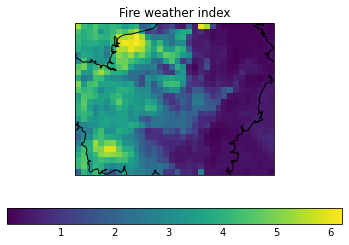

In [48]:
qplt.pcolormesh(fwi_cube[:,:,2000]) # plot the FWI in the second time step
plt.gca().coastlines()

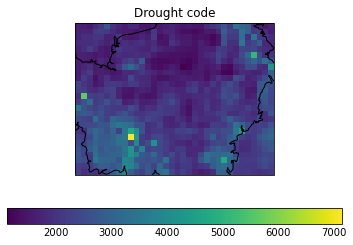

In [98]:
qplt.pcolormesh(dc_cube[:,:,10100]) # plot the FWI in the second time step
plt.gca().coastlines()

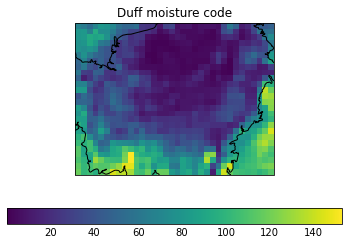

In [99]:
qplt.pcolormesh(dmc_cube[:,:,10100]) # plot the FWI in the second time step
plt.gca().coastlines()

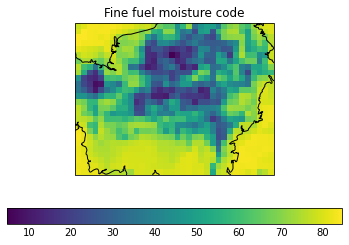

In [321]:
qplt.pcolormesh(ffmc_cube[:,:,10000]) # plot the FWI in the second time step
plt.gca().coastlines()

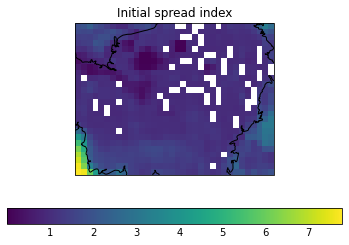

In [361]:
qplt.pcolormesh(isi_cube[:,:,0]) # plot the FWI in the second time step
plt.gca().coastlines()

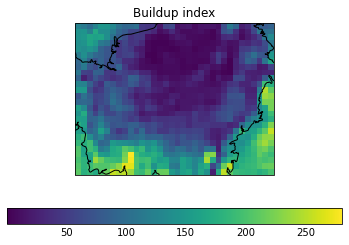

In [102]:
qplt.pcolormesh(bui_cube[:,:,10100]) # plot the FWI in the second time step
plt.gca().coastlines()

#### Select JJA and concatenate into time series (FWI as an example)

In [6]:
coord_cat.add_season(fwi_cube, 'time', name='clim_season')
coord_cat.add_season_year(fwi_cube, 'time', name='season_year')

In [7]:
annual_seasonal_mean = fwi_cube.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

In [51]:
for season, year in zip(
    annual_seasonal_mean.coord('clim_season')[:10].points,
    annual_seasonal_mean.coord('season_year')[:10].points):
    print(season + ' ' + str(year))

djf 1981
mam 1981
jja 1981
son 1981
djf 1982
mam 1982
jja 1982
son 1982
djf 1983
mam 1983


In [53]:
jja_constraint = iris.Constraint(clim_season='jja')
year_constraint = iris.Constraint (season_year=lambda v: v > 1980 and v <= 2014 )

fwi_jja = annual_seasonal_mean.extract(jja_constraint & year_constraint)

print (fwi_jja)

Fire weather index / (unknown)      (latitude: 26; longitude: 34; time: 34)
    Dimension coordinates:
        latitude                             x              -         -
        longitude                            -              x         -
        time                                 -              -         x
    Auxiliary coordinates:
        clim_season                          -              -         x
        day                                  -              -         x
        season_year                          -              -         x
        year                                 -              -         x
    Cell methods:
        sum                         pr, day, year
        mean                        clim_season, season_year
    Attributes:
        description                 'Numeric rating of fire intensity.'
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2023-08-22 16:09:51] fwi: FWI(tas=t2m,...
        invalid_standard_name 

In [66]:
# Calculate climatological mean
fwi_jja_ltm = fwi_jja.collapsed('time',
                        iris.analysis.MEAN)

print (fwi_jja_ltm)

Fire weather index / (unknown)      (latitude: 26; longitude: 34)
    Dimension coordinates:
        latitude                             x              -
        longitude                            -              x
    Scalar coordinates:
        clim_season                 jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jja|jj...
        day                         198.0, bound=(152, 244)
        season_year                 1994, bound=(1981, 2007)
        time                        1994-07-16 12:00:00, bound=(1981-06-01 00:00:00, 2007-08-31 00:00:00)
        year                        1994.0, bound=(1981, 2007)
    Cell methods:
        sum                         pr, day, year
        mean                        clim_season, season_year
        mean                        time
    Attributes:
        description                 'Numeric rating of fire intensity.'
        history                     'tas: \npr: \nsfcWind: \nhurs: \nlat: \n[2023-08-22 16:09:51] fwi

C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\iris\coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\iris\coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'day'.
  warnings.warn(msg.format(self.name()))
C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\iris\coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\iris\coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [55]:
fwi_mean_jja_ltm = fwi_jja_ltm.collapsed(['latitude', 'longitude'],
                        iris.analysis.MEAN)

print (fwi_mean_jja_ltm.data)

2.0841300620096357


C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\iris\cube.py:3696: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


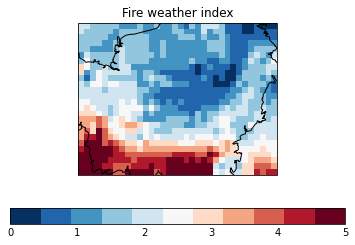

In [57]:
import matplotlib.cm as mpl_cm

qplt.pcolormesh(fwi_jja_ltm, cmap=mpl_cm.get_cmap('brewer_RdBu_11'), vmin=0,vmax=5) # plot the rainfall in the first time step
plt.gca().coastlines()

In [9]:
# Perform the area-weighted mean using the computed grid-box areas.
fwi_mean_jja = fwi_jja.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN)

C:\Users\user\Anaconda3\envs\xclim_env_2\lib\site-packages\iris\cube.py:3696: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


In [33]:
iris.save (fwi_mean_jja, 'fwi_mean_jja.nc')